# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precision

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128` (note: `np.float128` sometimes gives an error with `np.roll`!). Explain the error slopes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nm_lib import nm_lib as nm
plt.style.use('seaborn-v0_8-whitegrid')

def h(x, floattype):
    """Function to differentiate."""
    return np.cos( (np.pi * (x - 1) ) / 2 ) * np.exp( - ( (x - 3) / 2.5)**2 )

def analytical(xx, floattype):
    """Analytical derivative for comparison."""
    return np.exp( -floattype(0.16) * (-3 + xx)**2) * (floattype(1.5708) * np.cos((np.pi*xx) / 2) \
                   - (-floattype(0.96) + floattype(0.32) * xx) * np.sin((np.pi * xx) / 2))

def calculate_error(nint, floattype):
    """Calculate the error in the derivative 
    
    Parameters
    ----------
    nint : `int`
        Number of intervals
    floattype : `type`
        Type of float to use`
    
    Returns
    -------
    error : `float`
        The error in the derivative
    """
    x0 = floattype(-4.0)
    xf = floattype(10.0)

    nump = nint + 1
    xx = floattype(np.arange(nump)/(nump-1) * (xf-x0) + x0)
    pxl = xx[1] - xx[0]
    hp = nm.deriv_dnw(xx, h(xx, floattype))

    return np.mean(np.abs(hp - analytical(xx+pxl/2, floattype)))

In [2]:
def floats_comparison(floattype, nints):
    r"""Compare the error of the numerical derivative for different float types.
    
    Parameters
    ----------
    floattype : `type`
        The type of float to use for the calculation.
    nints : `list of int`
        The number of intervals to use for the numerical derivative.
        
    Returns
    -------
    errors : `list of float`
        The error for each number of intervals.
    """

    errors = []

    for n in nints:
        errors.append(floattype(calculate_error(n, floattype)))

    return errors


In [3]:
nints = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 1e6, 3e6]

err16 = floats_comparison(np.float16, nints)
err32 = floats_comparison(np.float32, nints)
err64 = floats_comparison(np.float64, nints)

/Users/juanms/Numerical_sim_course/students_2023/master/Aline_Rangoy_Brunvoll/nm_lib/nm_lib/nm_lib.py:36: RuntimeWarning: invalid value encountered in divide
  hp = (np.roll(hh, -1) - hh) / (np.roll(xx, -1) - xx)


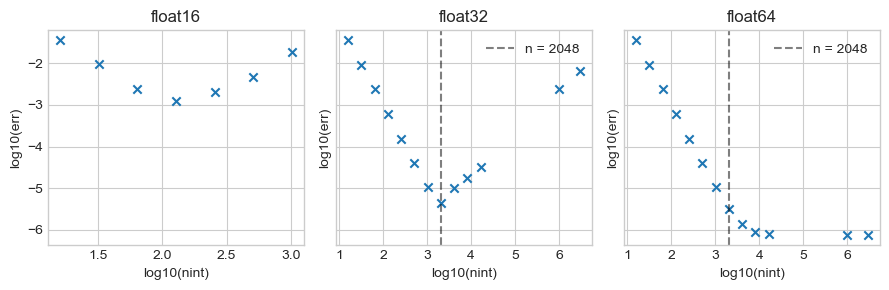

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax[0].scatter(np.log10(nints), np.log10(err16), marker='x'); ax[0].set(title='float16', xlabel='log10(nint)', ylabel='log10(err)')
ax[1].scatter(np.log10(nints), np.log10(err32), marker='x'); ax[1].set(title='float32', xlabel='log10(nint)', ylabel='log10(err)')
ax[2].scatter(np.log10(nints), np.log10(err64), marker='x'); ax[2].set(title='float64', xlabel='log10(nint)', ylabel='log10(err)')

ax[1].axvline(np.log10(2048), color='k', linestyle='--', alpha=0.5, label='n = 2048')
ax[2].axvline(np.log10(2048), color='k', linestyle='--', alpha=0.5, label='n = 2048')

ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

plt.tight_layout()

<span style="color:#78AE7E">

We see that the error for `float16` is the odd one out, and looks much less precise than the errors for `float32` and `float64`. It also has fewer points. 

</span>

<span style="color:#78AE7E">

The `float32`and `float64` errors both follow a steep slope until they reach $n=2048$. For the `float34` type, the curve turns around abruptly and increases again. This means that there is a limit to how many intervals we can use for the `float34` type before the calculations start to become less accurate again. I assume this decrease in accuracy would be due to truncation errors since the `float32` type doesn't have high enough bit precision to store the numbers accurately enough.

For the `float64` type we see that instead of the slope increasing, it flattens out. This means that after a certain number of intervals, the calculations will no longer increase in accuracy when adding more intervals, but rather stay pretty much the same. (But the computational resources will sharply increase!) So there is also a clear limit to how many intervals it is reasonable to use for the `float64` type.

I will do a linear fit of these slopes to examine the order of the lines.

</span>

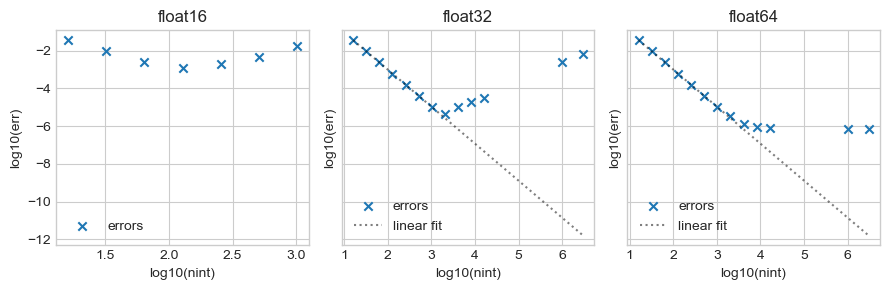

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

# Fit lines to the errors
# line16 = np.poly1d(np.polyfit(np.log10(nints[:-3]), np.log10(err16[:-3]), deg=1))
line32 = np.poly1d(np.polyfit(np.log10(nints[:-8]), np.log10(err32[:-8]), deg=1))
line64 = np.poly1d(np.polyfit(np.log10(nints[:-8]), np.log10(err64[:-8]), deg=1))

# Plot errors
ax[0].scatter(np.log10(nints), np.log10(err16), marker='x', label='errors') 
ax[1].scatter(np.log10(nints), np.log10(err32), marker='x', label='errors') 
ax[2].scatter(np.log10(nints), np.log10(err64), marker='x', label='errors')

# Plot linear fits
# ax[0].plot(np.log10(nints), line16(np.log10(nints)), label='linear fit', ls=':', c='k', alpha=0.5)
ax[1].plot(np.log10(nints), line32(np.log10(nints)), label='linear fit', ls=':', c='k', alpha=0.5)
ax[2].plot(np.log10(nints), line64(np.log10(nints)), label='linear fit', ls=':', c='k', alpha=0.5)

# Layout for plots
ax[0].set(title='float16', xlabel='log10(nint)', ylabel='log10(err)')
ax[1].set(title='float32', xlabel='log10(nint)', ylabel='log10(err)')
ax[2].set(title='float64', xlabel='log10(nint)', ylabel='log10(err)')
ax[0].legend(loc='lower left'); ax[1].legend(loc='lower left'); ax[2].legend(loc='lower left')

plt.tight_layout()


<span style="color:#78AE7E">

I am unable to fit the `float16` error, since `float16` is not supported in `np.poly1d`. However, we clearly see that the slope of the `float16` error is much less steep than the other float types, and that `float16` is not a good choice for this problem.

</span>

In [6]:
print('slope for float32:', line32.coef[0])
print('slope for float64:', line64.coef[0])

slope for float32: -1.961916997497069
slope for float64: -1.9618776902091266


<span style="color:#78AE7E">

Both the `float32` and `float64` errors have slopes close to -2, meaning that the error has a quadratic dependence on the number of gridpoints. 

However, the slopes are very similar, which means that in this case, using `float32` and `float64` will give very similar results, as long as the number of gridpoints is not past the limit of $n = 4028$.  



</span>

<span style="color:green">JMS</span>.

<span style="color:blue">Good. Agree float16 is not able to resolve the calculations at any resolution. </span>.
